# Big Mart Sales Prediction

Bigmart is a big supermarket chain, with stores all around the country. The management of the shop had set out a challenge to all Data Scientists to predict **sales per product** for each store.

The shop has collected sales data of prodicts across 10 store in different cities over a given period of time.

### Breakdown of problem statement
This is a **Supervised learning ML problem** with a target as: **Item Outlet Sales**
Also, since we are expected to predict the sale price of a given object, this is a _Regression Task_


### Features of the dataset:

- **Item_Identifier**: Unique product ID  

- **Item_Weight**: Weight of product  

- **Item_Fat_Content**: Whether the product is low fat or not  
 
- **Item_Visibility**: The % of total display area of all products in a store allocated to the particular product  

- **Item_Type**: The category to which the product belongs  

- **Item_MRP**: Maximum Retail Price (list price) of the product  

- **Outlet_Identifier**: Unique store ID  

- **Outlet_Establishment_Year**: The year in which store was established  

- **Outlet_Size**: The size of the store in terms of ground area covered  

- **Outlet_Location_Type**: The type of city in which the store is located  

- **Outlet_Type**: Whether the outlet is just a grocery store or some sort of supermarket  

- **Item_Outlet_Sales**: Sales of the product in the particulat store. This is the outcome variable to be predicted.  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Filters all the warnings and ignores them all
import warnings
warnings.filterwarnings('ignore')

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

 ###  Data Preprocessing & Exploratory Data Analysis

In [4]:
print(test.shape, train.shape)

(5681, 11) (8523, 12)


In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# the prices of these items will be predicted
test.head(3) 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
# Lets check how many NaN values we have
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Lets replace all the Null values in Item_weight by its average Weight 

train_mean = train['Item_Weight'].mean()
train['Item_Weight'].replace(np.nan, train_mean, inplace = True)
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Replace Null values in Outlet_size as Medium

train['Outlet_Size'].replace(np.nan, 'Medium', inplace = True)
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
# How many null values in Test Data
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
# Same With Test Data
# Lets replace all the Null values in Item_weight by its average Weight and Outlet_Size with Medium

test_mean = test['Item_Weight'].mean()
test['Item_Weight'].replace(np.nan, test_mean, inplace = True)

test['Outlet_Size'].replace(np.nan, 'Medium', inplace = True)
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [13]:
# We will combine the two dataframes together and every point in test df will be labeled as test and in train, 
# it will be labelled as train

train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train, test], ignore_index=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [14]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test


We see that the Item_Outlet_Sales have NaN values in the Test data. Since prices cannot be null, we will replace them with 0.


In [15]:
# How many null Prices?
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [16]:
# Replace them with 0
df['Item_Outlet_Sales'].replace(np.nan, 0, inplace=True)
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0.0,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.0,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Medium,Tier 2,Supermarket Type1,0.0,test


## Univariate Analysis

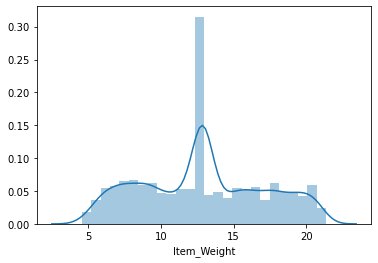

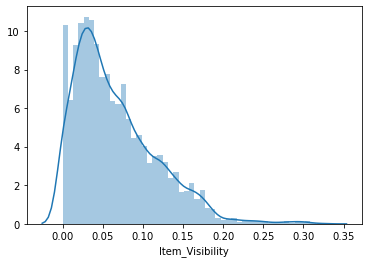

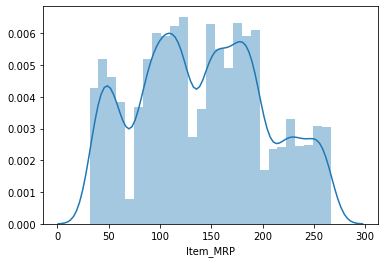

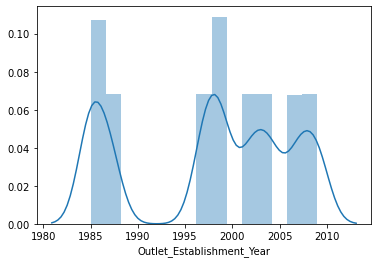

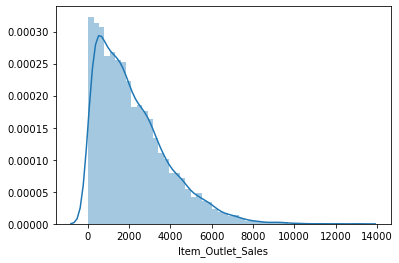

In [17]:
# After Cleaning the data

for i in train.describe().columns:
    sns.distplot(train[i].dropna())
    plt.show()

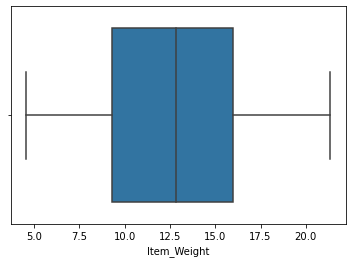

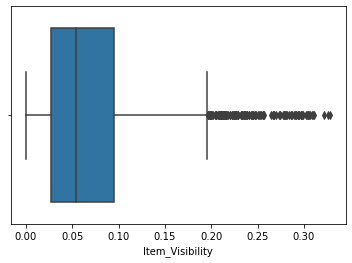

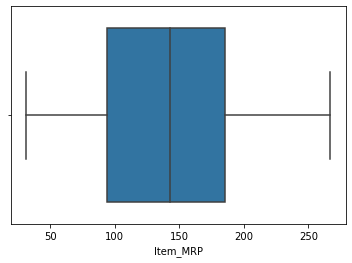

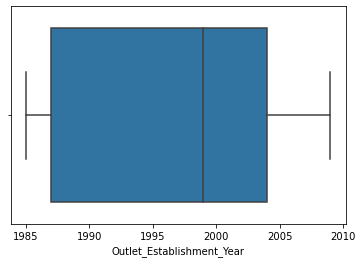

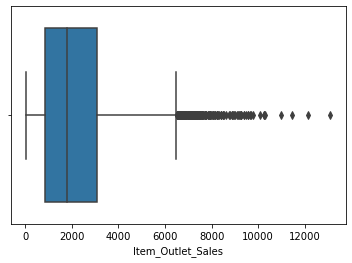

In [18]:
# After Cleaning the data

for i in train.describe().columns:
    sns.boxplot(train[i].dropna())
    plt.show()

**Distribution of Item Type**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

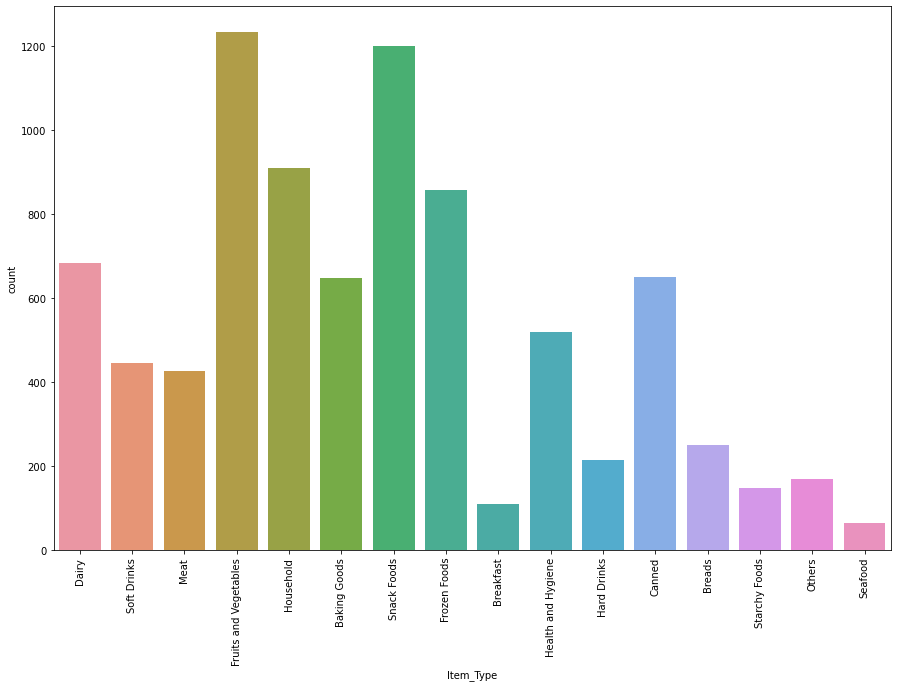

In [19]:
plt.figure(figsize = (15,10))
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

In [20]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**Distribution of Outlet Size**

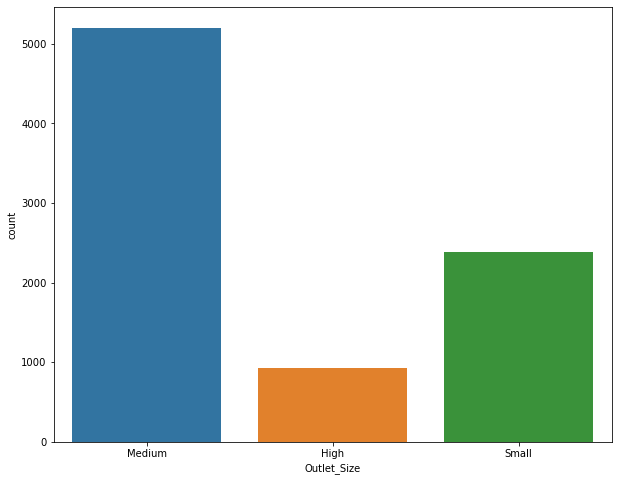

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(train.Outlet_Size)

In [22]:
train.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**Distribution of Outlet Location**

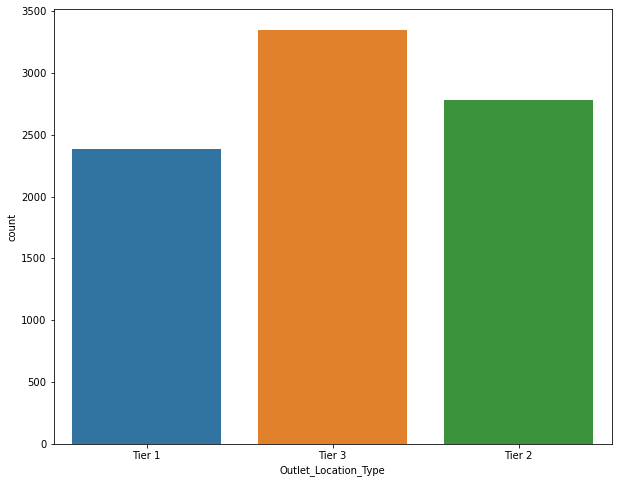

In [23]:
plt.figure(figsize = (10,8))
sns.countplot(train.Outlet_Location_Type)

In [24]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

**Distribution of Outlet Type**

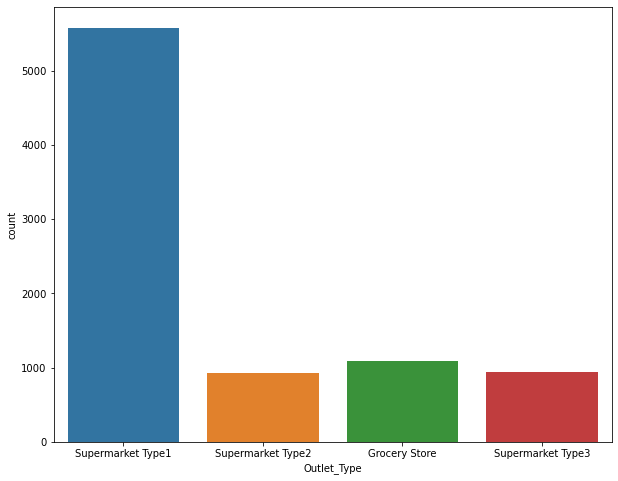

In [25]:
plt.figure(figsize = (10,8))
sns.countplot(train.Outlet_Type)

In [26]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## BiVariate Analysis

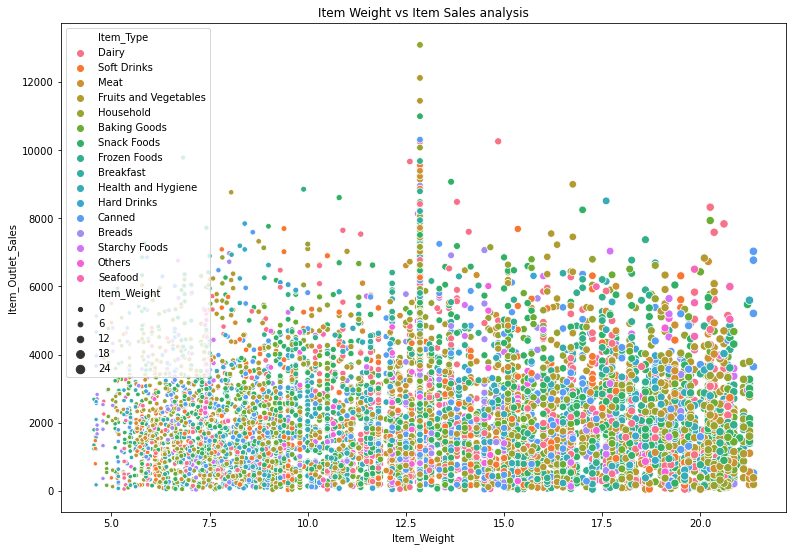

In [27]:
# Item Weight vs Item Sales

plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item Weight vs Item Sales analysis')

sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', hue='Item_Type', size='Item_Weight', data=train)

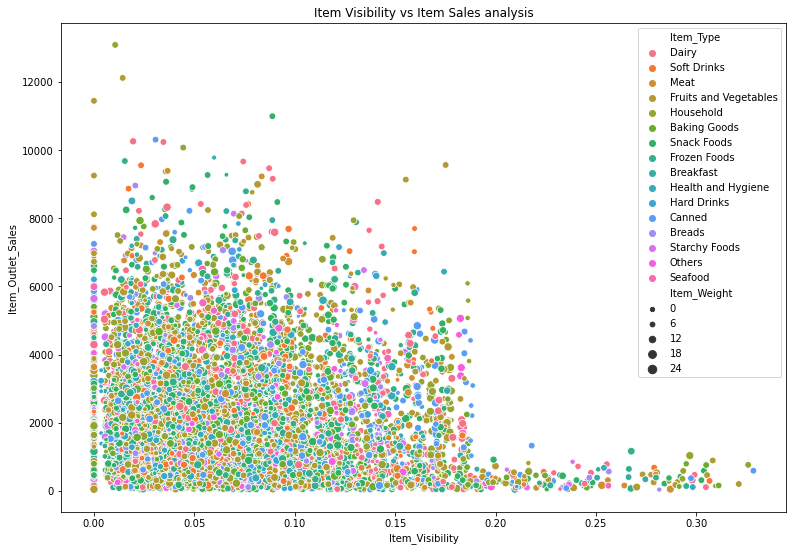

In [28]:
# Item Visibility vs Item Sales

plt.figure(figsize=(13,9))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item Visibility vs Item Sales analysis')

sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Type', size='Item_Weight', data=train)

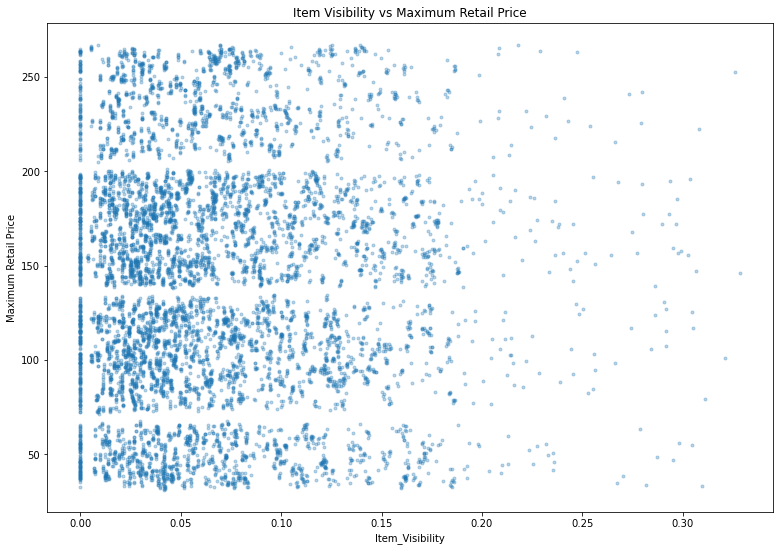

In [29]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item Visibility vs Maximum Retail Price')
plt.plot(train.Item_Visibility, train.Item_MRP, '.', alpha=0.3)

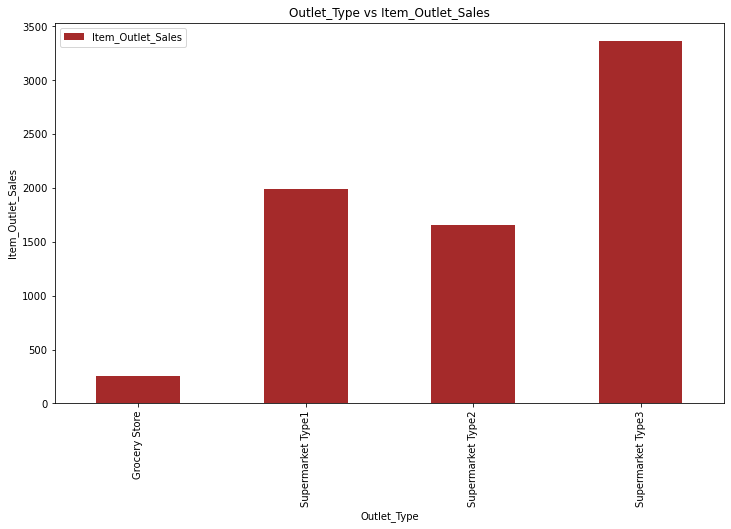

In [30]:
out_type_pivot = train.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales', aggfunc=np.median)

out_type_pivot.plot(kind='bar', color='brown', figsize=(12,7))

plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet_Type vs Item_Outlet_Sales')
plt.show()

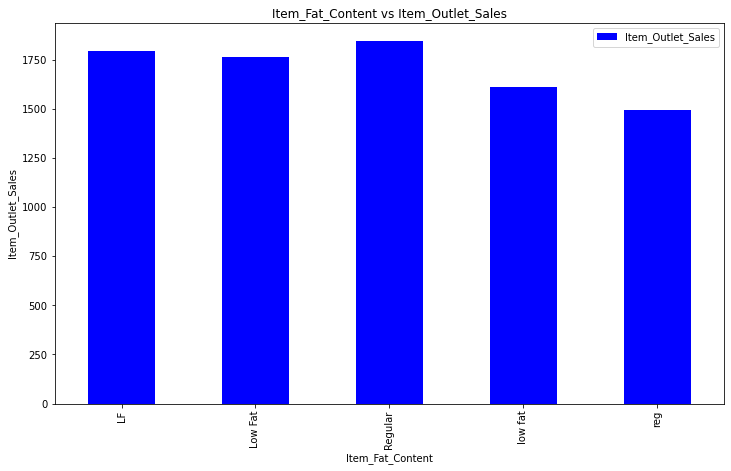

In [31]:
item_fat_content = train.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)

item_fat_content.plot(kind='bar', color='blue', figsize=(12,7))

plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Fat_Content vs Item_Outlet_Sales')
plt.show()

## Does the amount of fat affect the amount of sales of the BigMart?

In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [33]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [34]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [35]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

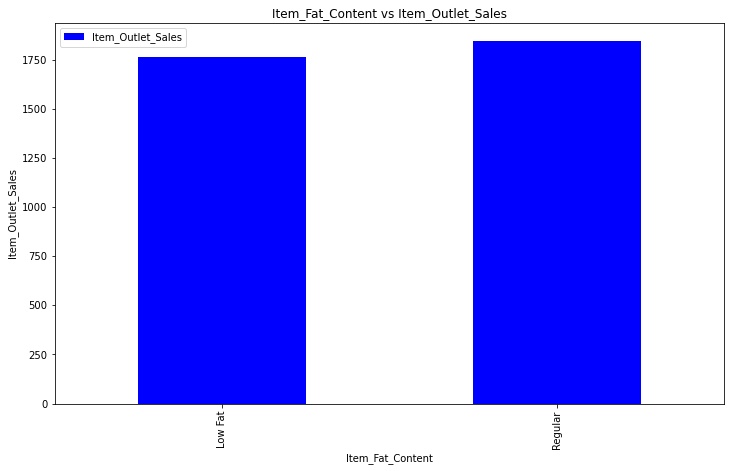

In [36]:
item_fat_content = train.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)

item_fat_content.plot(kind='bar', color='blue', figsize=(12,7))

plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Fat_Content vs Item_Outlet_Sales')
plt.show()

In [37]:
train.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


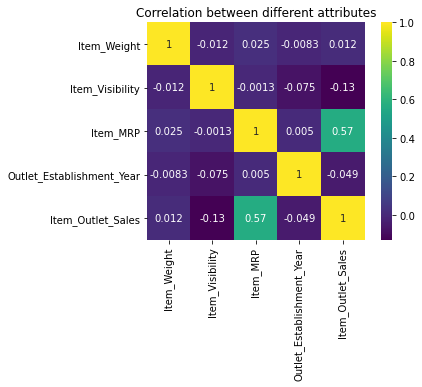

In [38]:
sns.heatmap(train.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

## Feature Engineering and Manufacturing


In [39]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [40]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

### Outlet Years

In [41]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [42]:
df['Outlet_Years'] = 2009 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [43]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

The item labels or identifiers are basically **FD=Food, DR=Drinks, NC=Non-consumables**

In [44]:
df['Item_Identifier'].value_counts()

FDB58    10
FDU52    10
FDW01    10
FDD51    10
DRK37    10
         ..
FDH58     7
FDO33     7
DRN11     7
NCL42     7
FDM50     7
Name: Item_Identifier, Length: 1559, dtype: int64

For us to do better analysis we will group the items into three identifiers; Non consumables, Drinks, Food.  
First we will change the labels into the full word. 

In [45]:
df['New_ID']=df['Item_Identifier'].apply(lambda x: x[0:2]) 

In [46]:
df['New_ID'] = df['New_ID'].map({'FD':'Food', 'NC':'Non-Consumable','DR':'Drinks'})

df['New_ID'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_ID, dtype: int64

From this we can see that there are Non-Consumables that are being assigned Fat Content, why? so we will change **Non-Consumables** to **Non-Edible**

In [47]:
df.loc[df['New_ID']=='Non-Consumable','Item_Fat_Content'] = 'Non_Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_Edible    2686
Name: Item_Fat_Content, dtype: int64